In [1]:
import numpy as np
import pandas as pd
from scipy import stats as st

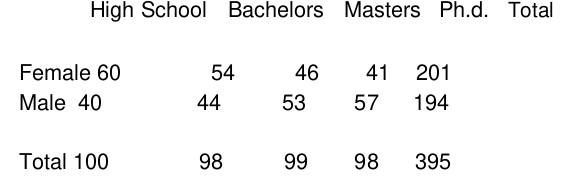

In [3]:
dic={'H_School':[60,40], 'Bachelors':[54, 44], 'Masters':[46, 53], 'Ph.D.':[41, 57]}
index=['Female', 'Male']
table_O = pd.DataFrame(dic, index=index)
table_O

,H_School,Bachelors,Masters,Ph.D.
Female,60,54,46,41
Male,40,44,53,57


In [4]:
table_E = table_O.copy()
total = (table_O['H_School']+table_O['Bachelors']+table_O['Masters']+table_O['Ph.D.']).sum()
column =table_O.columns.values
row =table_O.index
for i in column:
    for j in row:
        table_E[i][j]=(table_O[i].sum()*table_O.loc[j].sum())/total
table_E

,H_School,Bachelors,Masters,Ph.D.
Female,50,49,50,49
Male,49,48,48,48


In [5]:
x_f=[]
for i in column:
    for j in row:
        x=(np.square(table_O[i][j]-table_E[i][j])/table_E[i][j])
        x_f.append(x)
x_2_test=np.array(x_f).sum()
x_2_test

8.331054421768707

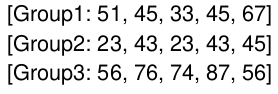

In [85]:
# following the steps in https://people.richland.edu/james/lecture/m170/ch13-1wy.html

dic={'Group1':[51, 45, 33, 45, 67], 'Group2':[23, 43, 23, 43, 45], 'Group3':[56, 76, 74, 87, 56]}
table = pd.DataFrame(dic)
table

,Group1,Group2,Group3
0,51,23,56
1,45,43,76
2,33,23,74
3,45,43,87
4,67,45,56


In [86]:
# Calculation of Grand mean

# Sumation of all samples/total numer of samples (N)
GM1 = (table['Group1'].sum()+table['Group2'].sum()+table['Group3'].sum())/15
print('GM1 = ', GM1)
table.loc[len(table.index)]=np.mean(table)
table = table.rename(index={5:'Mean'})
table

GM1 =  51.13333333333333


,Group1,Group2,Group3
0,51.0,23.0,56.0
1,45.0,43.0,76.0
2,33.0,23.0,74.0
3,45.0,43.0,87.0
4,67.0,45.0,56.0
Mean,48.2,35.4,69.8


In [87]:
# Between Group Variation
SS_B = 5*np.square(48.2-GM1)+5*np.square(35.4-GM1)+5*np.square(69.8-GM1)
SS_B

3022.933333333333

In [88]:
# The variance due to the interaction between the samples MS_B = SS_B/df_B, where df_B is degrees of freedom 
# df_B = (k - 1), where k is the number of samples
df_B = 3-1
MS_B = SS_B/df_B
MS_B

1511.4666666666665

In [89]:
# The variation due to differences within individual samples is SS_W
# The degree of freedom here is df_W = N - k, where N
# First we have to get squares of differences within groups.
for i in range(0,len(table.columns)):
    table['(x'+ str(i+1)+'- mean'+str(i+1)+')^2']= np.square(table.iloc[:-1, i]-table.iloc[-1][i])
table

,Group1,Group2,Group3,(x1- mean1)^2,(x2- mean2)^2,(x3- mean3)^2
0,51.0,23.0,56.0,7.84,153.76,190.44
1,45.0,43.0,76.0,10.24,57.76,38.44
2,33.0,23.0,74.0,231.04,153.76,17.64
3,45.0,43.0,87.0,10.24,57.76,295.84
4,67.0,45.0,56.0,353.44,92.16,190.44
Mean,48.2,35.4,69.8,NaN,NaN,NaN


In [90]:
table.loc[len(table.index)]=table.iloc[:-1,3:].sum()
table = table.rename(index={6:'Sum_distance'})
table

,Group1,Group2,Group3,(x1- mean1)^2,(x2- mean2)^2,(x3- mean3)^2
0,51.0,23.0,56.0,7.84,153.76,190.44
1,45.0,43.0,76.0,10.24,57.76,38.44
2,33.0,23.0,74.0,231.04,153.76,17.64
3,45.0,43.0,87.0,10.24,57.76,295.84
4,67.0,45.0,56.0,353.44,92.16,190.44
Mean,48.2,35.4,69.8,NaN,NaN,NaN
Sum_distance,NaN,NaN,NaN,612.80,515.20,732.80


In [91]:
SS_W = table.iloc[-1][3:].sum()
# The variance due to the differences within individual samples is MS_W = SS_W/df_W 
df_W = 15-3
MS_W = (SS_W)/df_W
MS_W

155.06666666666666

In [92]:
# F_critical(2.12) = 3.8853
F_test = (MS_B/MS_W).round(2)
F_test

9.75

In [103]:
# ANOVA Table
dic1 = {'SS': [SS_B, SS_W, (SS_B+SS_W)], 
        'df': [df_B, df_W, 'NA'],
        'MS': [MS_B, MS_W, 'NA'],
        'F': [F_test, 'NA', 'NA']
      }
index = ['Samples', 'Error', 'Total'] 
ANOVA_table = pd.DataFrame(dic1, index=index)
ANOVA_table

,SS,df,MS,F
Samples,3022.933333,2,1511.466667,9.75
Error,1860.800000,12,155.066667,NA
Total,4883.733333,NA,NA,NA


In [105]:
# Effect size
n_2= SS_B/(SS_B+SS_W)
n_2

0.61898001528885

In [106]:
dic={'A':[10, 20, 30, 40, 50], 'B':[5, 10, 15, 20, 25]}
table = pd.DataFrame(dic)
table

,A,B
0,10,5
1,20,10
2,30,15
3,40,20
4,50,25


In [107]:
# Calculation of Grand mean

GM = (table['A'].sum()+table['B'].sum())/10
print('GM = ', GM)
table.loc[len(table.index)]=np.mean(table)
table = table.rename(index={5:'Mean'})
table

GM =  22.5


,A,B
0,10.0,5.0
1,20.0,10.0
2,30.0,15.0
3,40.0,20.0
4,50.0,25.0
Mean,30.0,15.0


In [108]:
# Between Group Variation
SS_B = 5*np.square(30.0-GM)+5*np.square(15.0-GM)
SS_B

562.5

In [109]:
# The variance due to the interaction between the samples MS_B = SS_B/df_B, where df_B is degrees of freedom 
# df_B = (k - 1), where k is the number of samples
df_B = 2-1
MS_B = SS_B/df_B
MS_B

562.5

In [110]:
# The variation due to differences within individual samples is SS_W
# The degree of freedom here is df_W = N - k, where N
# First we have to get squares of differences within groups.
for i in range(0,len(table.columns)):
    table['(x'+ str(i+1)+'- mean'+str(i+1)+')^2']= np.square(table.iloc[:-1, i]-table.iloc[-1][i])
table

,A,B,(x1- mean1)^2,(x2- mean2)^2
0,10.0,5.0,400.0,100.0
1,20.0,10.0,100.0,25.0
2,30.0,15.0,0.0,0.0
3,40.0,20.0,100.0,25.0
4,50.0,25.0,400.0,100.0
Mean,30.0,15.0,NaN,NaN


In [111]:
table.loc[len(table.index)]=table.iloc[:-1,2:].sum()
table = table.rename(index={6:'Sum_distance'})
table

,A,B,(x1- mean1)^2,(x2- mean2)^2
0,10.0,5.0,400.0,100.0
1,20.0,10.0,100.0,25.0
2,30.0,15.0,0.0,0.0
3,40.0,20.0,100.0,25.0
4,50.0,25.0,400.0,100.0
Mean,30.0,15.0,NaN,NaN
Sum_distance,NaN,NaN,1000.0,250.0


In [112]:
SS_W = table.iloc[-1][2:].sum()
# The variance due to the differences within individual samples is MS_W = SS_W/df_W 
df_W = 10-2
MS_W = (SS_W)/df_W
MS_W

156.25

In [113]:
# F_critical(1,8) = 5.3177 with 5% of significance level
F_test = (MS_B/MS_W).round(2)
F_test

3.6

In [114]:
# ANOVA Table
dic1 = {'SS': [SS_B, SS_W, (SS_B+SS_W)], 
        'df': [df_B, df_W, 'NA'],
        'MS': [MS_B, MS_W, 'NA'],
        'F': [F_test, 'NA', 'NA']
      }
index = ['Samples', 'Error', 'Total'] 
ANOVA_table = pd.DataFrame(dic1, index=index)
ANOVA_table

,SS,df,MS,F
Samples,562.5,1,562.5,3.6
Error,1250.0,8,156.25,NA
Total,1812.5,NA,NA,NA


In [115]:
# Effect size
n_2= SS_B/(SS_B+SS_W)
n_2

0.3103448275862069